In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data_and_labels, test_data_and_labels) = fashion_mnist.load_data()

In [3]:
(train_data, train_labels) = train_data_and_labels
(test_data, test_labels) = test_data_and_labels

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_data[0].shape

(28, 28)

In [6]:
train_labels[0].shape

()

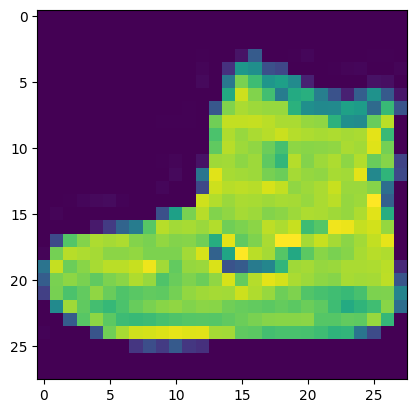

In [7]:
plt.imshow(train_data[0]);


In [8]:
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Bag


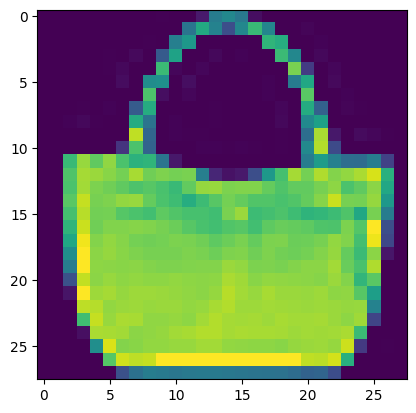

In [9]:
index_of_choice = 100
plt.imshow(train_data[index_of_choice]);
print(classes_names[train_labels[index_of_choice]])

Trouser
Ankle boot
Coat
Dress


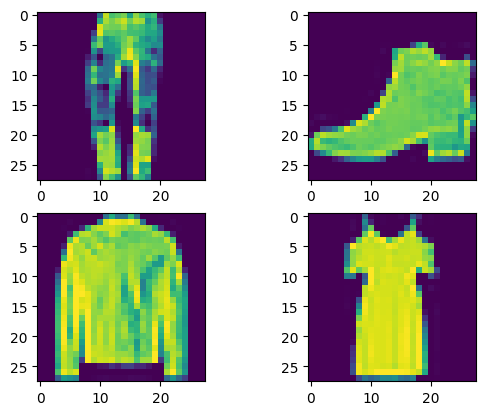

<Figure size 700x700 with 0 Axes>

In [10]:
import random
index_of_choice = random.randint(0, 60000)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train_data[index_of_choice+i]);
    print(classes_names[train_labels[index_of_choice+i]])
plt.figure(figsize=(7, 7))
plt.axis='off'

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
def normalize(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [13]:
from keras.layers import Flatten

In [14]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

])


model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,413,260 (5.39 MB)

 Trainable params: 1,413,260 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
test_data.dtype

dtype('uint8')

In [17]:
history = model_1.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=1, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.7424 - loss: 6.3890 - val_accuracy: 0.8326 - val_loss: 0.4631


In [18]:
train_data_n = train_data / 255.0
test_data_n = test_data / 255.0


In [19]:
train_data_n.min()

0.0

In [20]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         100,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 886,110 (3.38 MB)

 Trainable params: 886,110 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history_2 = model_2.fit(train_data_n, tf.one_hot(train_labels, depth=10), epochs=11, validation_data=(test_data_n, tf.one_hot(test_labels, depth=10)))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.7848 - loss: 0.5965 - val_accuracy: 0.8583 - val_loss: 0.3909
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8645 - loss: 0.3705 - val_accuracy: 0.8618 - val_loss: 0.3787
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8772 - loss: 0.3296 - val_accuracy: 0.8668 - val_loss: 0.3672
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8866 - loss: 0.3012 - val_accuracy: 0.8661 - val_loss: 0.3711
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8922 - loss: 0.2847 - val_accuracy: 0.8686 - val_loss: 0.3689
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8994 - loss: 0.2642 - val_accuracy: 0.8707 - val_loss: 0.3584
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - accuracy: 0.9040 - loss: 0.2506 - val_accuracy: 0.8713 - val_loss: 0.3677
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9089 -

Text(0.5, 0, 'epochs')

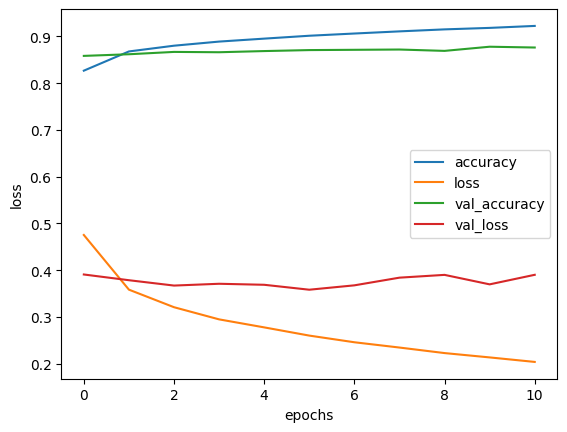

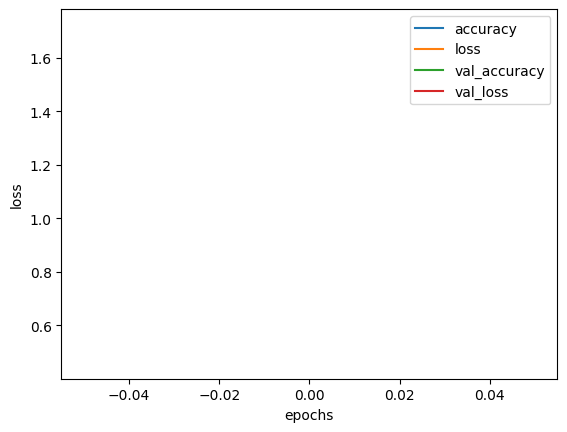

In [22]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = model_2.predict(test_data_n)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [25]:
y_pred_classes = tf.round(y_pred)

In [26]:
y_pred_classes = tf.argmax(y_pred_classes, axis=1)

In [27]:
cm = confusion_matrix(test_labels, y_pred_classes)

In [28]:
import seaborn as sns

<Axes: >

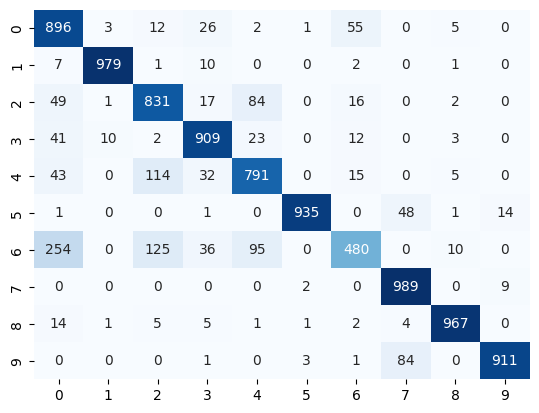

In [31]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [33]:
print(cm)

[[896   3  12  26   2   1  55   0   5   0]
 [  7 979   1  10   0   0   2   0   1   0]
 [ 49   1 831  17  84   0  16   0   2   0]
 [ 41  10   2 909  23   0  12   0   3   0]
 [ 43   0 114  32 791   0  15   0   5   0]
 [  1   0   0   1   0 935   0  48   1  14]
 [254   0 125  36  95   0 480   0  10   0]
 [  0   0   0   0   0   2   0 989   0   9]
 [ 14   1   5   5   1   1   2   4 967   0]
 [  0   0   0   1   0   3   1  84   0 911]]


In [34]:
from sklearn.metrics import recall_score, f1_score

In [40]:
y_pred_classes = tf.argmax(y_pred, axis=1) # Get the class with highest probability
y_pred_classes = y_pred_classes.numpy()    # Convert to NumPy array

recall = recall_score(test_labels, y_pred_classes, average=None)
f1 = f1_score(test_labels, y_pred_classes, average=None)

f1

array([0.839303  , 0.98296593, 0.78418605, 0.8900675 , 0.79803922,
       0.96345857, 0.63082437, 0.93082353, 0.97097097, 0.94208893])

In [41]:
recall

array([0.867, 0.981, 0.843, 0.923, 0.814, 0.936, 0.528, 0.989, 0.97 ,
       0.911])

In [55]:
import random

In [65]:
  def plot_random_img(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    target_image = images[i]
    pred_pro = model_2.predict(target_image.reshape(1, 28, 28))
    pred_label = tf.argmax(pred_pro, axis=1)  # pred_label is a Tensor

    # Extract the predicted class as a scalar value
    pred_label_scalar = pred_label.numpy().item()

    true_label = classes[true_labels[i]]
    plt.imshow(target_image,cmap=plt.cm.binary)

    # Format the scalar value instead of the Tensor
    # Removed the problematic y_pred_nump and formatted pred_label_scalar
    plt.xlabel("Pred: {}  (True:{})".format(pred_label_scalar, true_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


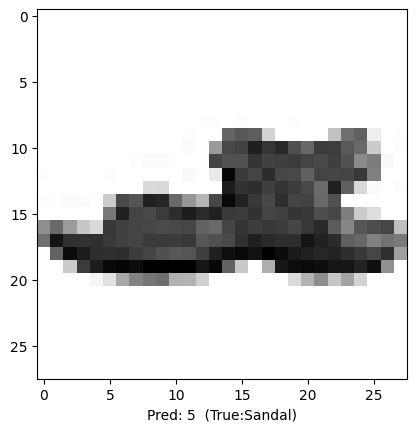

In [66]:
plot_random_img(model_2, test_data, test_labels, classes_names)